In [9]:
import requests
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [4]:
#Gathering stations for which data has to be fetched from api
mumbai_stations=['us-consulate','bandra','nmmc-airoli','vile-parle-west','colaba','kurla','worli','chhatrapati-shivaji-intl.-airport-t2','vasai-west']
delhi_stations=['','jawaharlal-nehru-stadium','mother-dairy-plant--parparganj','shaheed-sukhdev-college-of-business-studies--rohini','iti-shahdra--jhilmil-industrial-area','pooth-khurd--bawana','mundka','sonia-vihar-water-treatment-plant-djb','lodhi-road','siri-fort','pgdav-college--sriniwaspuri','crri-mathura-road','dite-okhla','dr.-karni-singh-shooting-range','major-dhyan-chand-national-stadium','punjabi-bagh','dwarka','igi-airport-terminal-3','national-institute-of-malaria-research--sector-8--dwarka','igi-airport','ito','alipur','narela','iti-jahangirpuri','burari-crossing','satyawati-college','delhi-institute-of-tool-engineering--wazirpur','north-campus','anand-vihar']
noida_stations=['sector-125','sector-116','sector-62','sector-1']
lucknow_stations=['talkatora','central-school']
bangalore_stations=['city-railway-station','saneguravahalli','peenya','btm','bwssb']
Kolkata_station=['us-consulate','victoria','rabindra-bharati-university','jadavpur','fort-william','bidhannagar','ballygunge']
patna_stations=['muradpur','rajbansi-nagar','samanpura','govt.-high-school-shikarpur','igsc-planetarium-complex']
Indore_stations=['chhoti-gwaltoli'] 
gzb_stations=['sanjay-nagar','vasundhara','indirapuram','loni']
meerut_stations=['pallavpuram-phase-2','ganga-nagar','jai-bhim-nagar']
jaipur_stations=['shastri-nagar','police-commissionerate','adarsh-nagar','vk-industrial-area-jaipur']
jodhpur_stations=['jodhpur','collectorate-jodhpur']
howrah_stations=['padmapukur','ghusuri','belur-math']
fbd_stations=['sector16a-faridabad','sector-30']
gur_stations=['nise-gwal-pahari','sector-51','teri-gram']
beng_stations=['jayanagar-5th-block','hebbal','silk-board','jayanagar-5th-block','hombegowda-nagar','bapuji-nagar','bwssb-kadabesanahalli']
pune_stations=['bhumkar-chowk','nigdi','bhosari','alandi','lohegaon','hadapsar','manjri','shivajinagar','katraj','karve-road-pune']
bul_stations=['yamunapuram']

#Certain api's have different endpoints for e.g delhi and pune
delhi_api='delhi'
mumbai_api='india/mumbai'
noida_api='india/noida'
lucknow_api='india/lucknow'
bangalore_api='india/bangalore'
Kolkata_api='india/kolkata'
patna_api='india/patna'
indore_api='india/indore'
gzb_api='india/ghaziabad'
meerut_api='india/meerut'
jaipur_api='india/jaipur'
jodhpur_api='india/jodhpur'
howrah_api='india/howrah'
fbd_api='india/faridabad'
gur_api='india/gurugram'
pune_api='pune'
beng_api='india/bengaluru'
bul_api='india/bulandshahr'

In [5]:
#for generating dataframe from json objects fetched from api
def generate_df(state_api,stations,City):
    df1=pd.DataFrame()
    for i in range(len(stations)):
        r=requests.get(f"https://api.waqi.info/feed/{state_api}/{stations[i]}/?token=b1962fea1af8060d8982ec2ad356fe3c330b0e2a")
    
        data=r.json()
        x=data['data']
       
        df=pd.DataFrame(x['iaqi'])
        df=df.rename( index={'v': '0'})
        df['city']=City
        df1=pd.concat([df1,df],ignore_index=True)
        
    return df1

In [6]:
#declaring an empty dataframe in which all other dataframes will be merged
combined_df=pd.DataFrame()#for generating dataframe from json objects fetched from api
def generate_df(state_api,stations,City):
    df1=pd.DataFrame()
    for i in range(len(stations)):
        r=requests.get(f"https://api.waqi.info/feed/{state_api}/{stations[i]}/?token=b1962fea1af8060d8982ec2ad356fe3c330b0e2a")
    
        data=r.json()
        x=data['data']
       
        df=pd.DataFrame(x['iaqi'])
        df=df.rename( index={'v': '0'})
        df['city']=City
        df1=pd.concat([df1,df],ignore_index=True)
        
    return df1

mumbai_df=generate_df(mumbai_api,mumbai_stations,'mumbai')
delhi_df=generate_df(delhi_api,delhi_stations,'delhi')
noida_df=generate_df(noida_api,noida_stations,'noida')
lucknow_df=generate_df(lucknow_api,lucknow_stations,'lucknow')
bangalore_df=generate_df(bangalore_api,bangalore_stations,'bangalore')
kolkata_df=generate_df(Kolkata_api,Kolkata_station,'kolkata')
patna_df=generate_df(patna_api,patna_stations,'patna')
indore_df=generate_df(indore_api,Indore_stations,'indore')
gzb_df=generate_df(gzb_api,gzb_stations,'ghaziabad')
meerut_df=generate_df(meerut_api,meerut_stations,'meerut')
jaipur_df=generate_df(jaipur_api,jaipur_stations,'jaipur')
jodhpur_df=generate_df(jodhpur_api,jodhpur_stations,'jodhpur')
howrah_df=generate_df(howrah_api,howrah_stations,'kolkata')
fbd_df=generate_df(fbd_api,fbd_stations,'faridabad')
gur_df=generate_df(gur_api,gur_stations,'gurugram')
pun_df=generate_df(pune_api,pune_stations,'pune')
beng_df=generate_df(beng_api,beng_stations,'bangalore')
bul_df=generate_df(bul_api,bul_stations,'bulandsheher')

#Dataframes will be merged
combined_df=pd.concat([combined_df,mumbai_df,delhi_df,noida_df,lucknow_df,bangalore_df,kolkata_df,patna_df,indore_df,gzb_df,meerut_df,jaipur_df,jodhpur_df,howrah_df,fbd_df,gur_df,pun_df,beng_df,bul_df],ignore_index=True)


In [7]:
combined_df

,dew,h,p,pm25,t,w,wg,city,co,no2,o3,pm10,so2,wd,r
0,27.0,72.500000,1005.000,59.0,32.500000,5.1000,20.0,mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27.0,68.100000,763.425,23.0,34.620000,0.1600,20.0,mumbai,8.5,0.6,4.8,27.0,4.7,NaN,NaN
2,22.0,70.311125,1011.000,NaN,11.441122,0.7000,NaN,mumbai,13.4,NaN,NaN,37.0,19.8,NaN,NaN
3,27.0,70.500000,1003.330,45.0,32.500000,1.0400,20.0,mumbai,1.7,0.4,6.1,47.0,4.9,NaN,NaN
4,22.0,93.655000,1004.375,16.0,24.000000,2.4225,9.7,mumbai,3.3,2.9,14.1,15.0,1.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,19.0,56.000000,710.000,72.0,29.800000,1.6000,NaN,bangalore,4.5,5.1,12.5,47.0,2.9,NaN,NaN
97,20.0,60.000000,710.000,70.0,22.800000,2.4000,NaN,bangalore,4.8,2.8,8.5,47.0,5.8,NaN,NaN
98,20.0,55.000000,718.000,42.0,19.900000,2.4000,NaN,bangalore,5.3,13.1,11.7,40.0,2.3,NaN,NaN
99,20.0,55.260000,913.450,32.0,29.000000,0.8050,NaN,bangalore,10.1,4.4,6.9,NaN,3.5,NaN,NaN


In [13]:
#dropping irrelevant columns
combined_df.drop(['dew','t','w','wg','wd','r','p','h'], axis=1, inplace=True)

In [14]:
combined_df.head(20)

,pm25,city,co,no2,o3,pm10,so2
0,59.0,mumbai,NaN,NaN,NaN,NaN,NaN
1,23.0,mumbai,8.5,0.6,4.8,27.0,4.7
2,NaN,mumbai,13.4,NaN,NaN,37.0,19.8
3,45.0,mumbai,1.7,0.4,6.1,47.0,4.9
4,16.0,mumbai,3.3,2.9,14.1,15.0,1.7
5,34.0,mumbai,1.6,5.0,5.4,69.0,6.8
6,17.0,mumbai,1.7,0.9,12.4,23.0,2.3
7,57.0,mumbai,0.6,9.0,2.4,900.0,19.3
8,5.0,mumbai,1.6,6.0,3.5,29.0,2.9
9,124.0,delhi,NaN,NaN,NaN,NaN,NaN


In [19]:
#handling null values
combined_df.isnull().sum()

#Replacing null values with mean
combined_df['so2']=combined_df['so2'].fillna(combined_df['so2'].mean())
combined_df['no2']=combined_df['no2'].fillna(combined_df['no2'].mean())
combined_df['pm25']=combined_df['pm25'].fillna(combined_df['pm25'].mean())
combined_df['pm10']=combined_df['pm10'].fillna(combined_df['pm10'].mean())

combined_df['co']=combined_df['co'].fillna(combined_df['co'].mean())
combined_df['o3']=combined_df['o3'].fillna(combined_df['o3'].mean())



In [20]:
combined_df.isnull().sum()


pm25    0
city    0
co      0
no2     0
o3      0
pm10    0
so2     0
dtype: int64

In [25]:
#handling duplicate rows
duplicate_rows = combined_df[combined_df.duplicated()]
print(duplicate_rows)

combined_df = combined_df.drop_duplicates()
combined_df.head(5)

         pm25       city         co        no2         o3       pm10       so2
88  59.000000       pune  52.000000  14.000000  54.000000  53.000000  5.409333
89  97.044444       pune   9.507778   9.564045  24.888235  76.780488  5.409333
92  97.044444       pune   9.507778   9.564045  24.888235  76.780488  5.409333
96  72.000000  bangalore   4.500000   5.100000  12.500000  47.000000  2.900000


,pm25,city,co,no2,o3,pm10,so2
0,59.000000,mumbai,9.507778,9.564045,24.888235,76.780488,5.409333
1,23.000000,mumbai,8.500000,0.600000,4.800000,27.000000,4.700000
2,97.044444,mumbai,13.400000,9.564045,24.888235,37.000000,19.800000
3,45.000000,mumbai,1.700000,0.400000,6.100000,47.000000,4.900000
4,16.000000,mumbai,3.300000,2.900000,14.100000,15.000000,1.700000


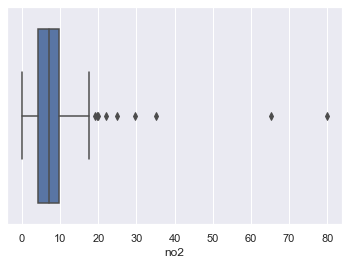

In [31]:
#visualizing outliers
sns.boxplot(x=combined_df['no2'])


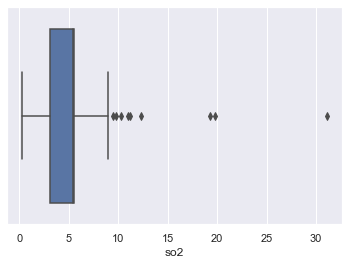

In [29]:
sns.boxplot(x=combined_df['so2'])


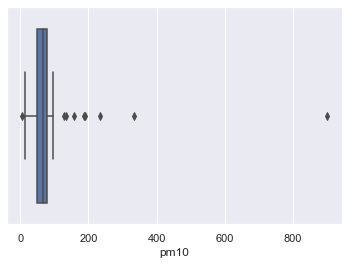

In [30]:
sns.boxplot(x=combined_df['pm10'])


In [33]:
#removing outliers

q1=combined_df.quantile(0.25)
q3=combined_df.quantile(0.75)
IQR = q3-q1
combined_df = combined_df[~((combined_df < (q1-1.5 * IQR)) |(combined_df > (q3 + 1.5 * IQR))).any(axis=1)]

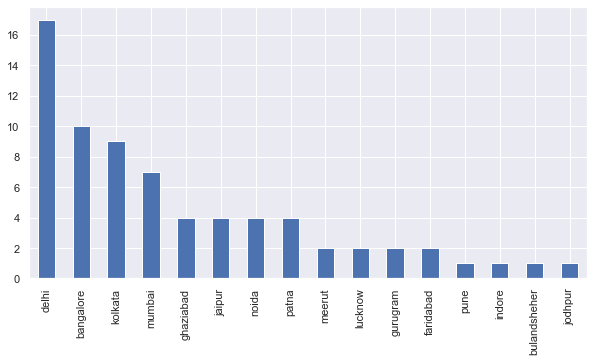

In [35]:
#composition of examples state wise
combined_df.city.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))


          pm25        co       no2        o3      pm10       so2
pm25  1.000000  0.290850  0.237763  0.366449  0.572705  0.374694
co    0.290850  1.000000  0.105885  0.153836  0.350927  0.086818
no2   0.237763  0.105885  1.000000  0.212454  0.254214  0.187983
o3    0.366449  0.153836  0.212454  1.000000  0.220924  0.319443
pm10  0.572705  0.350927  0.254214  0.220924  1.000000  0.299140
so2   0.374694  0.086818  0.187983  0.319443  0.299140  1.000000


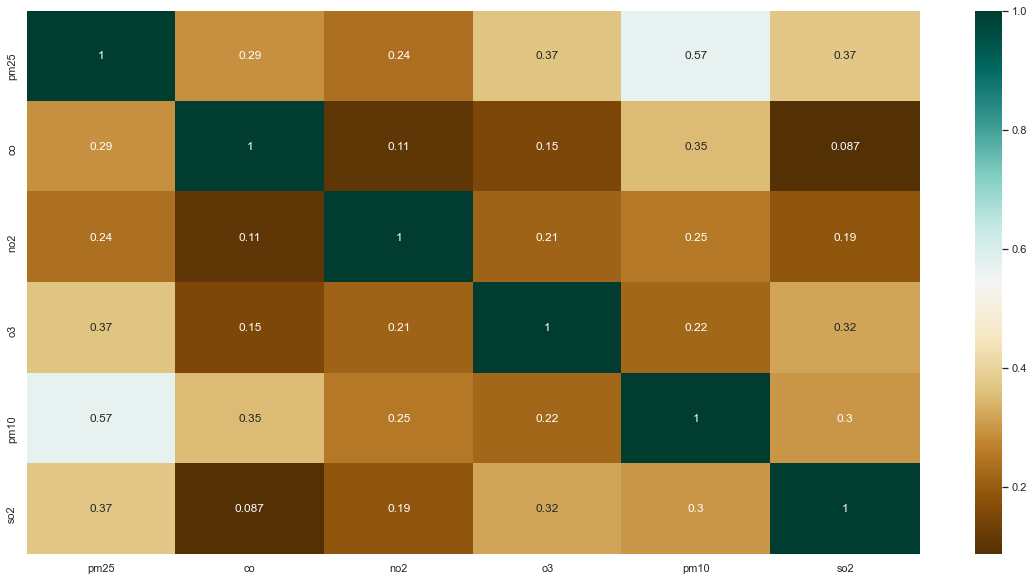

In [37]:
#finding corelation between gases
plt.figure(figsize=(20,10))
rel= combined_df.corr()
sns.heatmap(rel,cmap='BrBG',annot=True)
print(rel)

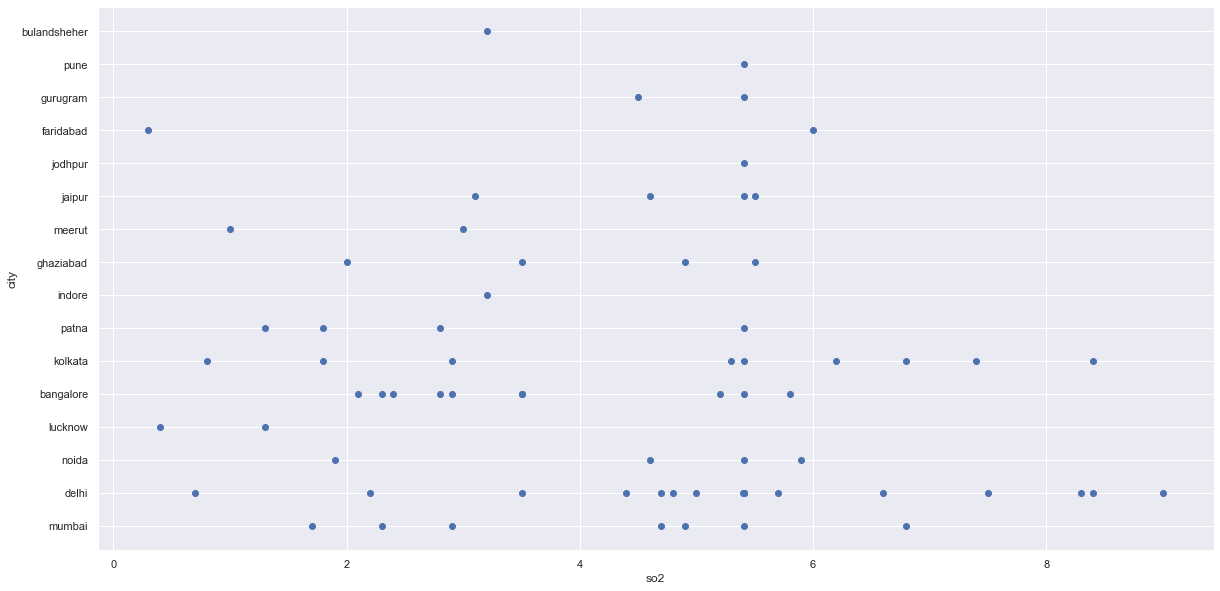

In [39]:
#so2 vs states
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(combined_df['so2'], combined_df['city'])
ax.set_xlabel('so2')
ax.set_ylabel('city')
plt.show()

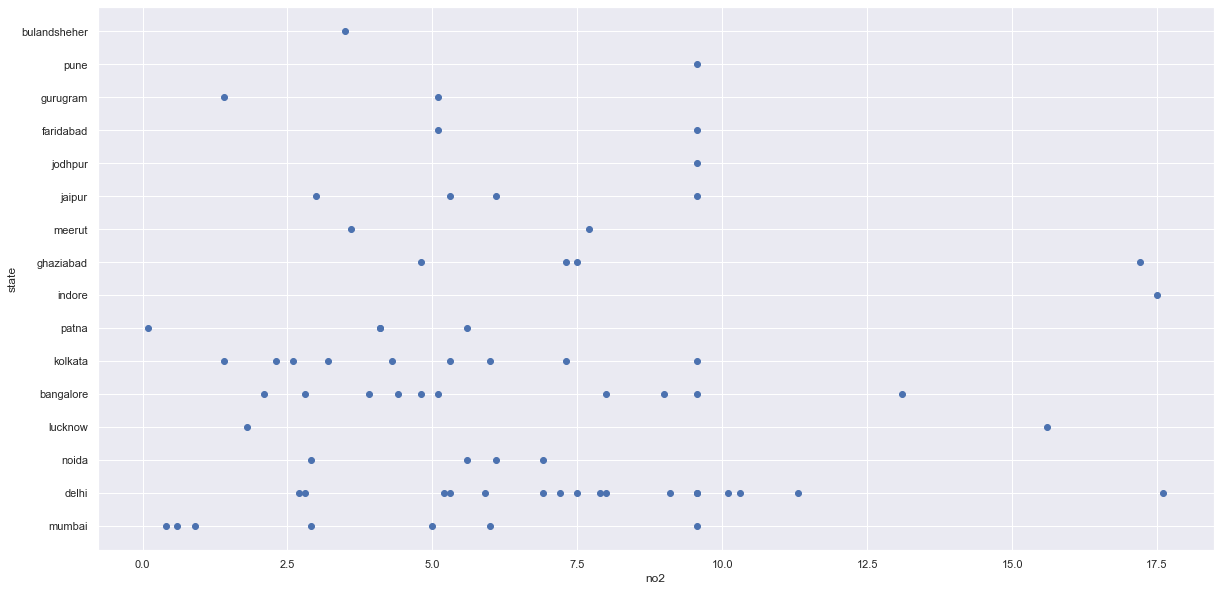

In [40]:
#no2 vs states

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(combined_df['no2'], combined_df['city'])
ax.set_xlabel('no2')
ax.set_ylabel('state')
plt.show()

In [41]:
#label encoding for city columns
labelencoder = LabelEncoder()
combined_df['city'] = labelencoder.fit_transform(combined_df['city'])
combined_df


,pm25,city,co,no2,o3,pm10,so2
0,59.0,12,9.507778,9.564045,24.888235,76.780488,5.409333
1,23.0,12,8.500000,0.600000,4.800000,27.000000,4.700000
3,45.0,12,1.700000,0.400000,6.100000,47.000000,4.900000
4,16.0,12,3.300000,2.900000,14.100000,15.000000,1.700000
5,34.0,12,1.600000,5.000000,5.400000,69.000000,6.800000
...,...,...,...,...,...,...,...
95,59.0,0,5.800000,4.800000,5.200000,55.000000,2.400000
97,70.0,0,4.800000,2.800000,8.500000,47.000000,5.800000
98,42.0,0,5.300000,13.100000,11.700000,40.000000,2.300000
99,32.0,0,10.100000,4.400000,6.900000,76.780488,3.500000


In [42]:
#Defining x and y feature set
X = combined_df[['pm25','co','no2','o3','pm10','so2']].values
X[0:5]
y = combined_df['city'].values
y [0:5]

array([12, 12, 12, 12, 12])

In [43]:
#normalizing data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.84512401,  1.02762333,  0.8182473 ,  0.08243312,  0.87481745,
         0.54277777],
       [-1.79325483,  0.71788521, -1.48736824, -1.36203799, -1.8281243 ,
         0.19785025],
       [-1.21384155, -1.37207875, -1.53880965, -1.26855977, -0.74218004,
         0.29510425],
       [-1.9776136 , -0.88032252, -0.89579203, -0.6933092 , -2.47969086,
        -1.26095975],
       [-1.50354819, -1.40281351, -0.35565723, -1.3188942 ,  0.45235864,
         1.21901725]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (56, 6) (56,)
Test set: (15, 6) (15,)


In [60]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [61]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([ 0,  0,  0,  2, 13])

In [62]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.44642857142857145
Test set Accuracy:  0.4
